In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots


In [2]:
df = pd.read_csv("/Users/furkandurmus/Desktop/Kaggle Projects/Data Science Projects/Bank Customer Churn Prediction/Churn_Modelling.csv")
df_copy = df.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [5]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [53]:
labels = ['Exited', 'Not Exited']
colors = ['#BF1050', '#52BF15']
fig = px.pie(df, values=df["Exited"].value_counts(), names=labels, color_discrete_sequence=colors)
fig.show()

In [54]:
labels = ['Exited', 'Not Exited']
fig = px.histogram(df, x='Geography', color='Exited', barmode="group", height=400)

fig.update_layout(title_text="Geography by Exited")

fig.show()

<AxesSubplot: xlabel='IsActiveMember', ylabel='count'>

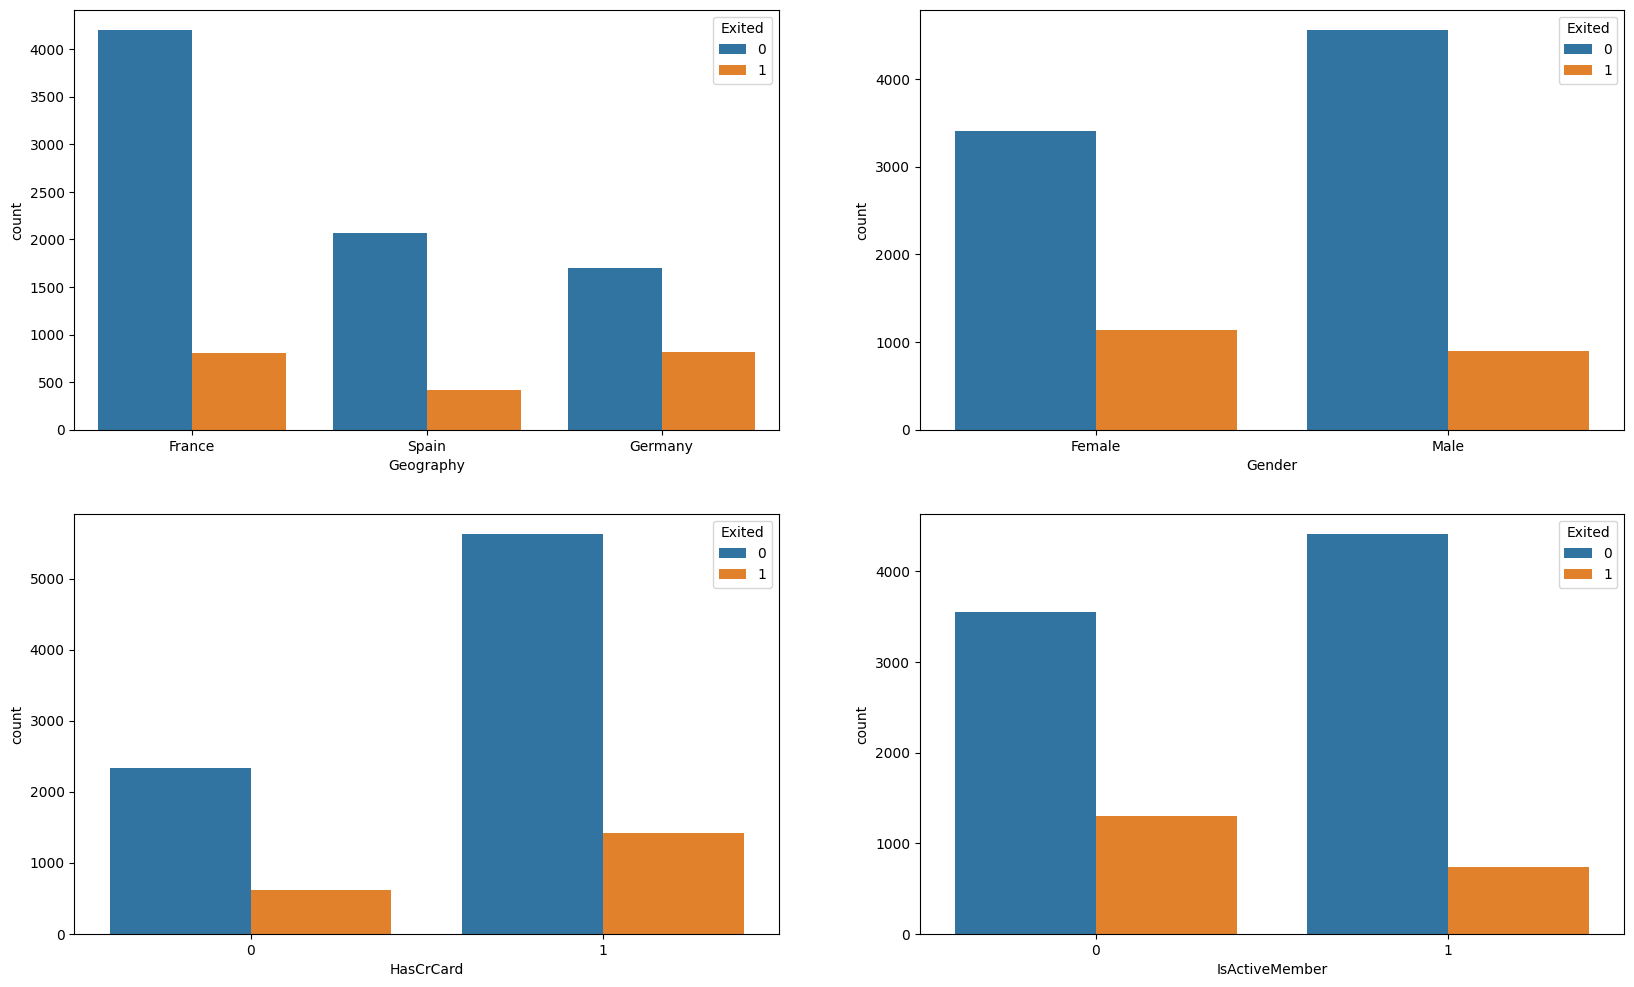

In [64]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [ ]:
fig = px.box()

In [74]:
df_age_card = df[df["Exited"] == 0].groupby("Age").size().reset_index(name="Count")
df_age_not_card = df[df["Exited"] == 1].groupby("Age").size().reset_index(name="Counts")

fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Scatter(x=df_age_card["Age"], y=df_age_card["Count"], mode='markers', name='Not Exited', marker=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=df_age_not_card["Age"], y=df_age_not_card["Counts"], mode='markers', name='Exited', marker=dict(color='red')), row=1, col=2)

fig.update_layout(title="Card Usage By Age")
fig.update_xaxes(title_text="Age", row=1, col=1)
fig.update_yaxes(title_text="Not Exited", row=1, col=1)
fig.update_xaxes(title_text="Age", row=1, col=2)
fig.update_yaxes(title_text="Exited", row=1, col=2)

fig.show()
